In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [10]:
df = pd.read_csv('../Data/hysteresis/attachments/hys_kjh.csv')

In [3]:
df.head(3)

,Unnamed: 0,e,f
0,1,0.000000,0.000000
1,2,0.000000,0.015758
2,3,0.000234,0.030466


<Axes: >

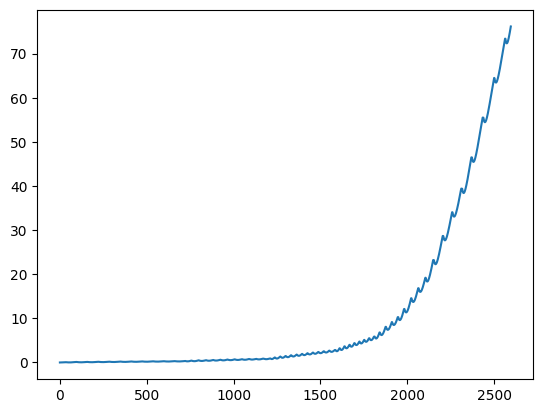

In [4]:
df.e.plot()

<Axes: >

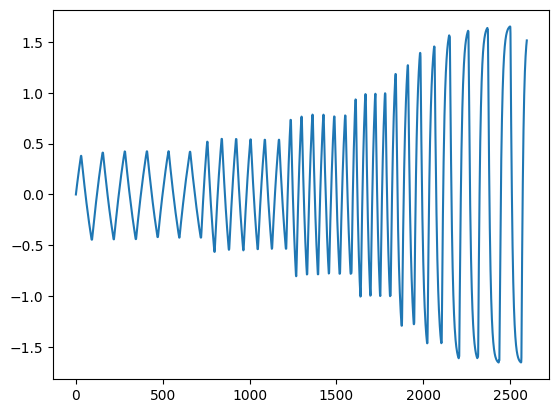

In [5]:
df.f.plot()

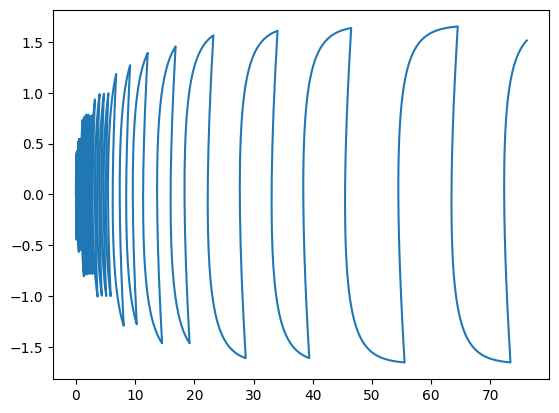

In [6]:
plt.plot(df.iloc[:,1], df.iloc[:,2])

In [12]:
df = df.iloc[:,1:]

<Axes: >

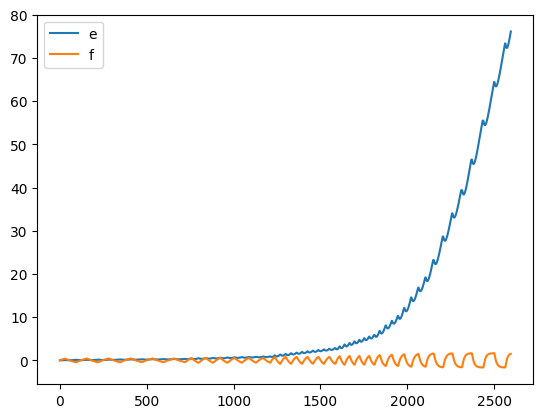

In [14]:
df.plot()

In [16]:
#hysteresis curve equation
def hys_curve(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f


,e,f
0,0.000000,0.000000
1,0.000000,0.015758
2,0.000234,0.030466
3,0.000668,0.044448
4,0.001355,0.059490
...,...,...
2592,75.189269,1.440519
2593,75.424117,1.462640
2594,75.655481,1.482004
2595,75.900685,1.500336


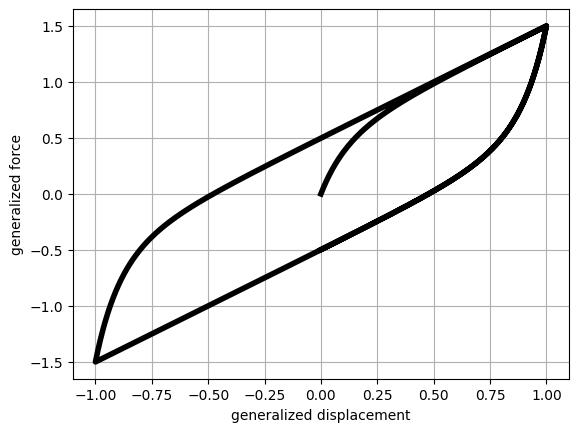

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# APPLIED DISPLACEMENT TIME HISTORY
dt = 0.001
t = np.arange(0, 1.5 + dt, dt)
a0 = 1
fr = 1
u = a0 * np.sin(2 * np.pi * fr * t[:len(t)])
v = 2 * np.pi * fr * a0 * np.cos(2 * np.pi * fr * t[:len(t)])
n = len(u)

# 1. INITIAL SETTINGS
# 1.1 Set the five model parameters
ka = 10.0
kb = 1.0
alfa = 10.0
beta1 = 0.0
beta2 = 0.0

# 1.2 Compute the internal model parameters
u0 = 0.5 * (((ka - kb) / 1e-20) ** (1 / alfa) - 1)
f0 = ((ka - kb) / 2) * (((1 + 2 * u0) ** (1 - alfa) - 1) / (1 - alfa))

# 1.3 Initialize the generalized force vector
f = np.zeros(n)

# 2. CALCULATIONS AT EACH TIME STEP
for i in range(1, n):
    # 2.1 Update the history variable
    uj = u[i - 1] + np.sign(v[i]) * (1 + 2 * u0) - np.sign(v[i]) * (((np.sign(v[i]) * (1 - alfa)) / (ka - kb)) * (f[i - 1] - beta1 * u[i - 1] ** 3 - beta2 * u[i - 1] ** 5 - kb * u[i - 1] - np.sign(v[i]) * f0 + (ka - kb) * (((1 + 2 * u0) ** (1 - alfa)) / (np.sign(v[i]) * (1 - alfa))))) ** (1 / (1 - alfa))

    # 2.2 Evaluate the generalized force at time t
    if (np.sign(v[i]) * uj) - 2 * u0 < np.sign(v[i]) * u[i] or np.sign(v[i]) * u[i] < np.sign(v[i]) * uj:
        f[i] = beta1 * u[i] ** 3 + beta2 * u[i] ** 5 + kb * u[i] + (ka - kb) * ((((1 + 2 * u0 + np.sign(v[i]) * (u[i] - uj)) ** (1 - alfa)) / (np.sign(v[i]) * (1 - alfa))) - (((1 + 2 * u0) ** (1 - alfa)) / (np.sign(v[i]) * (1 - alfa)))) + np.sign(v[i]) * f0
    else:
        f[i] = beta1 * u[i] ** 3 + beta2 * u[i] ** 5 + kb * u[i] + np.sign(v[i]) * f0

# PLOT
plt.figure()
plt.plot(u, f, 'k', linewidth=4)
plt.xlabel('generalized displacement')
plt.ylabel('generalized force')
plt.grid()
plt.show()


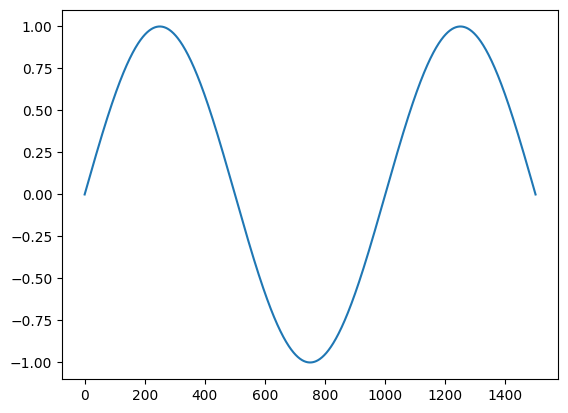

In [21]:
plt.plot(u)

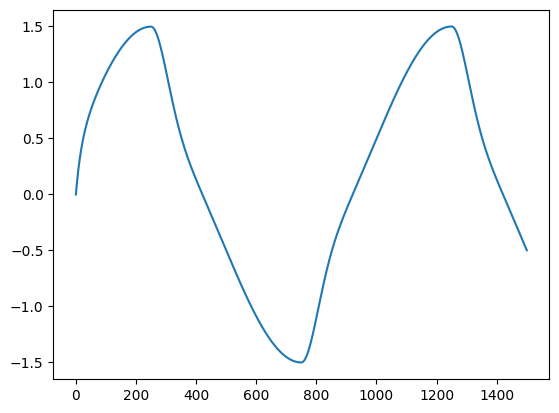

In [20]:
plt.plot(f)

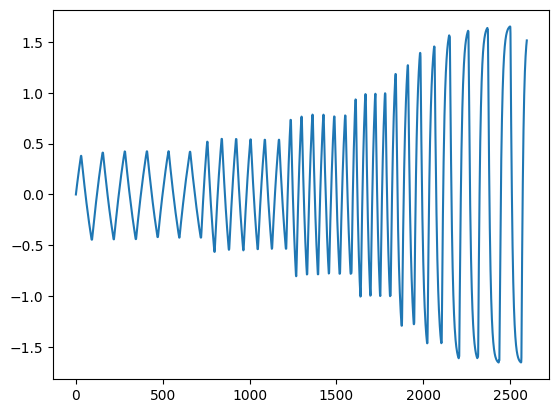

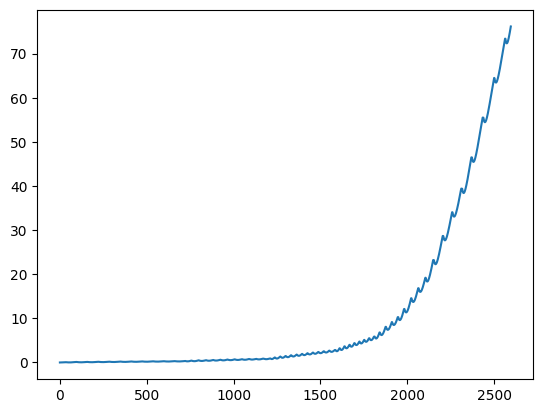

In [31]:
plt.plot(df.iloc[:,1])
plt.show()
plt.plot(df.iloc[:,0])
plt.show()

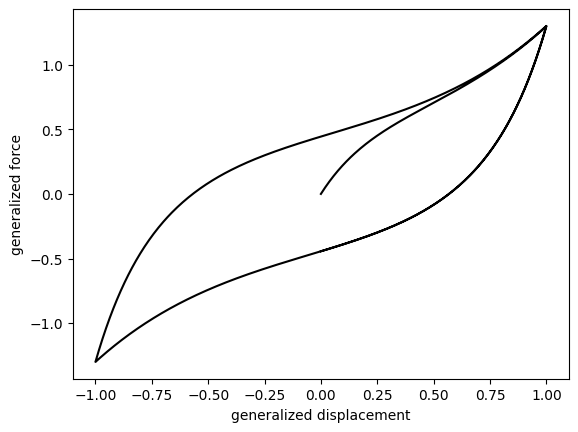

In [35]:
# APPLIED DISPLACEMENT TIME HISTORY
dt = 0.001
t = np.arange(0, 1.50 + dt, dt)
a0 = 1
fr = 1
u = a0 * np.sin(2 * np.pi * fr * t[:len(t)])
v = 2 * np.pi * fr * a0 * np.cos(2 * np.pi * fr * t[:len(t)])
n = len(u)

# INITIAL SETTINGS
# Set the four model parameters
ka = 5.0
kb = 0.5
alfa = 5.0
beta = 1.0
# Compute the internal model parameters
u0 = -(1 / (2 * alfa)) * np.log(10 ** -20 / (ka - kb))
f0 = ((ka - kb) / (2 * alfa)) * (1 - np.exp(-2 * alfa * u0))
# Initialize the generalized force vector
f = np.zeros(n)

# CALCULATIONS AT EACH TIME STEP
for i in range(1, n):
    # Update the history variable
    uj = u[i-1] + 2*u0*np.sign(v[i]) + np.sign(v[i])*(1/alfa)*np.log(np.abs(np.sign(v[i])*(alfa/(ka-kb))*(-2*beta*u[i-1]+np.exp(beta*u[i-1])-np.exp(-beta*u[i-1])+kb*u[i-1]+np.sign(v[i])*((ka-kb)/alfa)*np.exp(-2*alfa*u0)+np.sign(v[i])*f0-f[i-1])))
    # Evaluate the generalized force at time t
    if (np.sign(v[i])*uj-2*u0 < np.sign(v[i])*u[i]) or (np.sign(v[i])*u[i] < np.sign(v[i])*uj):
        f[i] = -2*beta*u[i] + np.exp(beta*u[i]) - np.exp(-beta*u[i]) + kb*u[i] - np.sign(v[i])*((ka-kb)/alfa)*(np.exp(-alfa*(np.sign(v[i])*(u[i]-uj)+2*u0))-np.exp(-2*alfa*u0)) + np.sign(v[i])*f0
    else:
        f[i] = -2*beta*u[i] + np.exp(beta*u[i]) - np.exp(-beta*u[i]) + kb*u[i] + np.sign(v[i])*f0

# PLOT
plt.figure()
plt.plot(u, f, 'k')
plt.xlabel('generalized displacement')
plt.ylabel('generalized force')
plt.show()


In [60]:
u, f

(array([0.00000000e+00, 6.28314397e-03, 1.25660399e-02, ...,
        1.25660399e-02, 6.28314397e-03, 3.67394040e-16]),
 array([ 0.        ,  0.01705897,  0.03368737, ..., -0.43725922,
        -0.44060094, -0.44393612]))

In [64]:
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM

In [158]:
x_tr = tf.convert_to_tensor(u[:1000])
y_tr = tf.convert_to_tensor(f[:1000])

x_te = tf.convert_to_tensor(u[1000:])

In [157]:
x_tr = tf.reshape(x_tr, (-1, 1, 1))
y_tr = tf.reshape(y_tr, (-1, 1, 1))

x_te = tf.reshape(x_te, (-1, 1, 1))

In [140]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(1, 1), return_sequences=True))
model.add(tf.keras.layers.Dense(1))

In [141]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 1, 100)            40800     
                                                                 
 dense_10 (Dense)            (None, 1, 1)              101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(loss = 'mse', optimizer = 'adam')

In [143]:
history = model.fit(x_tr, y_tr, epochs = 30)

Epoch 1/30
32/32 [==============================] - 2s 1ms/step - loss: 0.6174
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4704
Epoch 3/30
32/32 [==============================] - 0s 968us/step - loss: 0.3262
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.2037
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1228
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1224
Epoch 9/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 10/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1229
Epoch 11/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 12/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1224
Epoch 13/30
32/32 [============================

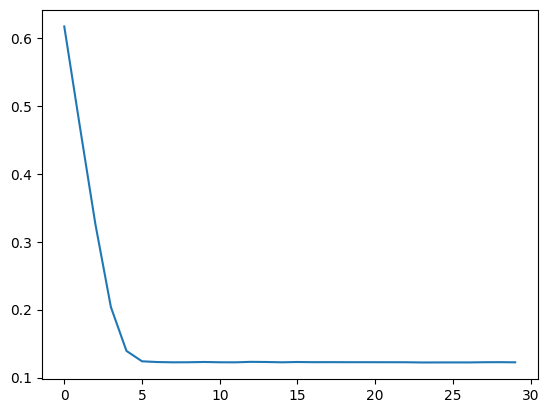

In [144]:
plt.plot(history.history['loss'])

In [146]:
pred = model.predict(x_te)

16/16 [==============================] - 0s 733us/step


In [154]:
pred = pred.reshape(-1,1)

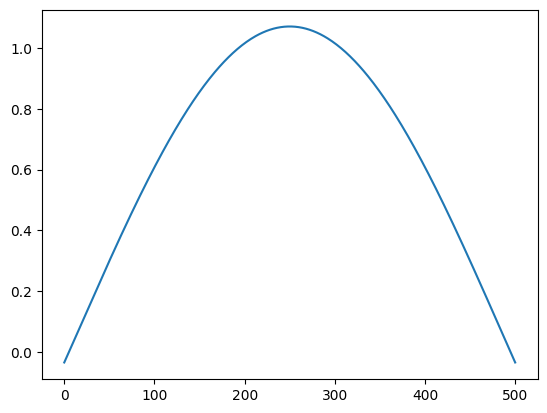

In [155]:
plt.plot(pred)

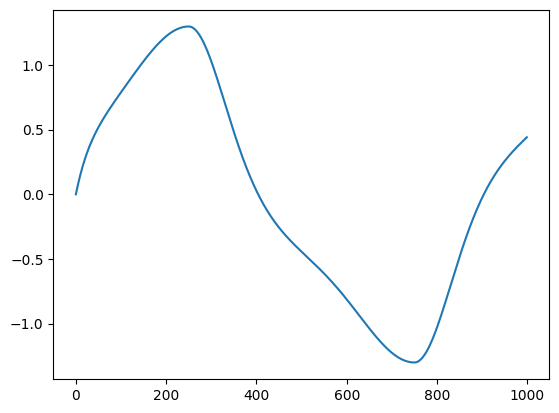

In [161]:
plt.plot(f[:1000])